# Imports et préparation des données

In [335]:
# Imports
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import dummy
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [336]:
# Fichier source
data = pd.read_csv('winequality-red.csv', sep=";")

X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

In [337]:
# Séparation training/testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# Scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [338]:
# Modèle à utiliser = KNeighborsRegressor()
model = neighbors.KNeighborsRegressor()

# Toutes les valeurs à tester
axe_X = range(3,30)
param_grid = {'n_neighbors':axe_X }

# Test pour l'optimisation du MSE

In [339]:
score = 'neg_mean_squared_error'

clf = model_selection.GridSearchCV(model, param_grid, cv=6, scoring=score, refit=True)

clf.fit(X_train, y_train)
best_params = clf.best_params_
score = clf.best_score_

score_MSE = []

for a, c in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tGRIDSCORES\t',  "MSE" , a, c))
    score_MSE.append(abs(a))

print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		GRIDSCORES	 MSE -0.633104954821 pour {'n_neighbors': 3}
		GRIDSCORES	 MSE -0.611930294906 pour {'n_neighbors': 4}
		GRIDSCORES	 MSE -0.59345844504 pour {'n_neighbors': 5}
		GRIDSCORES	 MSE -0.588893853639 pour {'n_neighbors': 6}
		GRIDSCORES	 MSE -0.585417008627 pour {'n_neighbors': 7}
		GRIDSCORES	 MSE -0.587061550492 pour {'n_neighbors': 8}
		GRIDSCORES	 MSE -0.583722238771 pour {'n_neighbors': 9}
		GRIDSCORES	 MSE -0.581849865952 pour {'n_neighbors': 10}
		GRIDSCORES	 MSE -0.580499117423 pour {'n_neighbors': 11}
		GRIDSCORES	 MSE -0.584760699037 pour {'n_neighbors': 12}
		GRIDSCORES	 MSE -0.582816441138 pour {'n_neighbors': 13}
		GRIDSCORES	 MSE -0.584067407124 pour {'n_neighbors': 14}
		GRIDSCORES	 MSE -0.580077450104 pour {'n_neighbors': 15}
		GRIDSCORES	 MSE -0.577035857909 pour {'n_neighbors': 16}
		GRIDSCORES	 MSE -0.577795918872 pour {'n_neighbors': 17}
		GRIDSCORES	 MSE -0.580031774402 pour {'n_neighbors': 18}
		GRIDSCORES	 MSE -0.580539114118 pour {'n_neighbors': 19}
		GRI

Le meilleur résultat est obtenu pour 16 voisins. C'est avec ce paramètre que sera effectué le test final un peu plus bas.

# Test pour l'optimisation du r2, pour pouvoir comparer les valeurs uniquement

In [340]:
score = 'r2'

clf2 = model_selection.GridSearchCV(model, param_grid, cv=6, scoring=score, refit=True)

clf2.fit(X_train, y_train)
best_params = clf2.best_params_
score = clf2.best_score_

score_r2 = []

for a, c in zip(clf2.cv_results_['mean_test_score'], clf2.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tGRIDSCORES\t',  "R2" , a, c))
    score_r2.append(abs(a))

print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		GRIDSCORES	 R2 0.0325447733716 pour {'n_neighbors': 3}
		GRIDSCORES	 R2 0.0646734679743 pour {'n_neighbors': 4}
		GRIDSCORES	 R2 0.0961990906233 pour {'n_neighbors': 5}
		GRIDSCORES	 R2 0.105831606019 pour {'n_neighbors': 6}
		GRIDSCORES	 R2 0.110204558322 pour {'n_neighbors': 7}
		GRIDSCORES	 R2 0.108857174054 pour {'n_neighbors': 8}
		GRIDSCORES	 R2 0.115516986598 pour {'n_neighbors': 9}
		GRIDSCORES	 R2 0.11715448154 pour {'n_neighbors': 10}
		GRIDSCORES	 R2 0.120645120929 pour {'n_neighbors': 11}
		GRIDSCORES	 R2 0.115048505275 pour {'n_neighbors': 12}
		GRIDSCORES	 R2 0.118196718844 pour {'n_neighbors': 13}
		GRIDSCORES	 R2 0.116452595688 pour {'n_neighbors': 14}
		GRIDSCORES	 R2 0.123251065587 pour {'n_neighbors': 15}
		GRIDSCORES	 R2 0.127459415786 pour {'n_neighbors': 16}
		GRIDSCORES	 R2 0.125785129025 pour {'n_neighbors': 17}
		GRIDSCORES	 R2 0.122451835431 pour {'n_neighbors': 18}
		GRIDSCORES	 R2 0.121083338749 pour {'n_neighbors': 19}
		GRIDSCORES	 R2 0.119287391904 pour

Le R2 est optimisé pour le même nombre de voisins que le knn

# Figure de représentation des valeurs pour r2 et le MSE

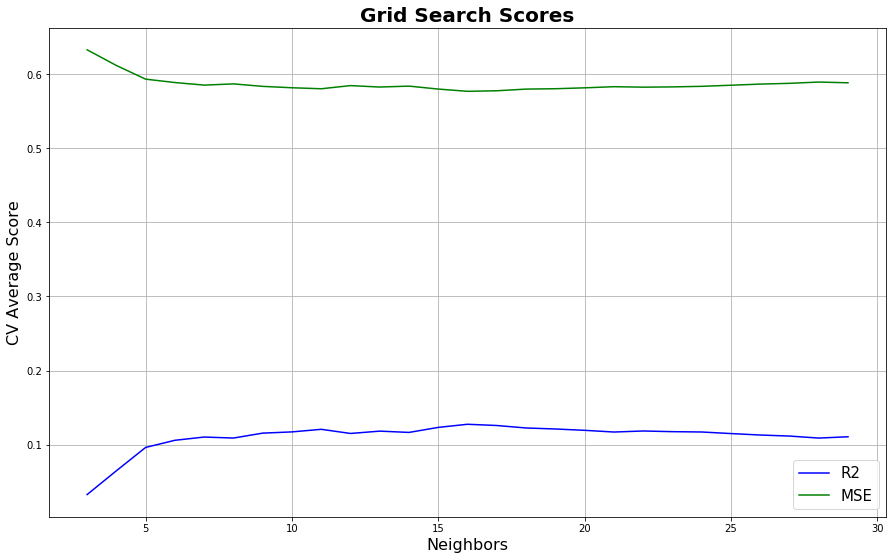

In [341]:
plt.figure(1, figsize=(15, 9))
            
plt.plot(axe_X, score_r2, label="R2", color='b')
plt.plot(axe_X, score_MSE, label="MSE", color='g')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel(name_param_1, fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.legend(loc="best", fontsize=15)
plt.grid('on')
plt.show()

__Conclusion :__
Les valeurs du r2 et du MSE semblent être inversément corrélées. On pourrait le vérifier avec une regréssion linéaire sur ces deux variables, mais ce n'est pas l'objet ici.

#  Comparaison des résultats des 3 prédictions :
* aléatoire
* médiane
* knn

In [342]:
# Prédiction aléatoire
y_pred_random = np.random.randint(np.min(y), np.max(y), len(X_test))

print("MSE : %.2f" % metrics.mean_squared_error(y_test, y_pred_random))

MSE : 2.82


In [343]:
# Prédiction suivant la valeur moyenne
dum = dummy.DummyRegressor(strategy='mean')
dum.fit(X_train_std, y_train)
y_pred_dum = dum.predict(X_test)

print("MSE : %.2f" % metrics.mean_squared_error(y_test, y_pred_dum))

MSE : 0.62


In [345]:
print("Rappel des paramètres optimaux :", clf.cv_results_['params'][clf.best_index_])

# Prédiction sur le jeu de test
y_pred = clf.predict(X_test)

print("\nMSE : %.2f" % metrics.mean_squared_error(y_test, y_pred))

Rappel des paramètres optimaux : {'n_neighbors': 16}

MSE : 0.50


__Conclusion :__
Notre algorithme a un peu mieux appris que les valeurs médianes (MSE de 0,5 contre 0,62). Le dummy est largement moins bon que ces deux derniers.